<a href="https://colab.research.google.com/github/HosseinEyvazi/NLP/blob/main/NLP_general_intro_and_word_embedding_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Definition of Natural Language Processing (NLP):**  
Natural Language Processing is a branch of artificial intelligence that focuses on enabling machines to understand, interpret, and generate human language in a way that is both meaningful and useful. Its primary goal is to bridge the communication gap between computers and humans.

---

**Challenges in NLP:**  
1. **Ambiguity:** Natural language is often ambiguous. For example, the word "bank" can refer to a "river bank" or a "financial bank."  
2. **Understanding Context:** Grasping the exact meaning of a sentence without considering its context is challenging.  
3. **Cultural Nuances:** Cultural-specific concepts, such as the Iranian tradition of *Tarof* (polite refusal or humility), can be difficult for NLP systems to interpret.  
4. **Managing Large Datasets:** Processing and analyzing vast amounts of linguistic data requires significant computational resources and advanced techniques.  

---

**Applications of NLP:**  

1. **Sentiment Analysis:**  
   Analyzing emotions expressed in text, such as reviews, tweets, or customer feedback, to determine if they are positive, negative, or neutral.  

2. **Chatbots and Virtual Assistants:**  
   Systems like Siri, Alexa, or customer service bots that respond to user queries and perform tasks.  

3. **Machine Translation:**  
   Tools like Google Translate that convert text from one language to another.  

4. **Speech Recognition:**  
   Converting spoken language into text, as used in voice assistants and transcription services.  

5. **Information Extraction:**  
   Extracting structured data from unstructured text.  
   **Example:** From the sentence "John Doe was born on 1990-01-15 in New York," extract "Name: John Doe," "Date of Birth: 1990-01-15," "Place of Birth: New York."  

6. **Text Summarization:**  
   Generating concise summaries of lengthy texts while retaining key information.  

7. **Named Entity Recognition (NER):**  
   Identifying and categorizing key entities in text, such as names of people, places, organizations, or dates.  
   **Example:** In the sentence "Elon Musk founded SpaceX in 2002," the entities "Elon Musk" (person), "SpaceX" (organization), and "2002" (date) are recognized.  

8. **Text Classification:**  
   Categorizing text into predefined groups or labels. For example, classifying emails as "spam" or "not spam."  


In [1]:
! wget https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz

--2025-07-04 11:24:55--  https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz’

aclImdb_v1.tar.gz   100%[===================>]  80.23M  7.52MB/s    in 18s     

2025-07-04 11:25:14 (4.40 MB/s) - ‘aclImdb_v1.tar.gz’ saved [84125825/84125825]



In [2]:
! tar -xzf aclImdb_v1.tar.gz

In [3]:
import os
import pandas as pd
from sklearn.utils import shuffle
import re
import numpy as np



#1. Load dataset

In [4]:


def load_imdb_data(base_dir='aclImdb', subset='train', shuffle_data=True, random_state=42):
    """
    Load IMDB movie reviews from the specified directory structure.

    Args:
        base_dir (str): Root directory containing the IMDB dataset
        subset (str): Either 'train' or 'test' to load respective data
        shuffle_data (bool): Whether to shuffle the resulting DataFrame
        random_state (int): Random seed for reproducibility

    Returns:
        pd.DataFrame: DataFrame containing reviews and labels
    """
    texts = []
    labels = []

    # Process positive reviews
    pos_dir = os.path.join(base_dir, subset, 'pos')
    if os.path.exists(pos_dir):
        for filename in os.listdir(pos_dir):
            file_path = os.path.join(pos_dir, filename)
            with open(file_path, 'r', encoding='utf-8') as file:
                texts.append(file.read())
                labels.append('positive')

    # Process negative reviews
    neg_dir = os.path.join(base_dir, subset, 'neg')
    if os.path.exists(neg_dir):
        for filename in os.listdir(neg_dir):
            file_path = os.path.join(neg_dir, filename)
            with open(file_path, 'r', encoding='utf-8') as file:
                texts.append(file.read())
                labels.append('negative')

    # Create DataFrame
    df = pd.DataFrame({'text': texts, 'label': labels})

    # Shuffle if requested
    if shuffle_data:
        df = shuffle(df, random_state=random_state)

    # Convert labels to binary (1 for positive, 0 for negative)
    df['label'] = df['label'].replace(['positive', 'negative'], ['1', '0'])

    return df

df_train = load_imdb_data(subset='train')
print(df_train.head())
print(f"DataFrame shape: {df_train.shape}")


df_test = load_imdb_data(subset='test')
print(df_test.head())
print(f"DataFrame shape: {df_train.shape}")

                                                    text label
6868   A well-made and imaginative production, refres...     1
24016  I won't say this movie was bad, but it wasn't ...     0
9668   Franco proves, once again, that he is the prin...     1
13640  The Good Earth is not a great film by any mean...     0
14018  There is no possible reason I can fathom why t...     0
DataFrame shape: (25000, 2)
                                                    text label
6868   If you like movies that will make you think, t...     1
24016  The worst movie I've ever seen in my life. Fro...     0
9668   Nothing short of magnificent photography/cinem...     1
13640  the hills have eyes is not a great film by any...     0
14018  This film is much the same as Cannibal Holocau...     0
DataFrame shape: (25000, 2)


In [5]:
y_train = df_train['label']
x_train = df_train['text']
x_test = df_test['text']
y_test = df_test['label']


### Natural Language Preprocessing for Sentiment Analysis

#### Why Preprocessing Matters
Preprocessing transforms raw text into a clean, standardized format suitable for analysis. For sentiment tasks, effective preprocessing:
- Reduces noise and irrelevant features
- Decreases computational load
- Improves model accuracy by focusing on meaningful content

---

### Essential Preprocessing Steps

#### 1. Punctuation Removal
**Why remove punctuation?**
- Punctuation rarely carries sentiment meaning
- Eliminating it reduces vocabulary size by ~15%
- Prevents skewed representations (e.g., "good!" vs "good")
- **Exception**: Preserve emoticons (:) :( ) and currency symbols ($, €) when relevant

```python
import string

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

# Example
raw_text = "I loved this movie! It's absolutely wonderful!!!"
clean_text = remove_punctuation(raw_text)
# Result: "I loved this movie Its absolutely wonderful"
```

#### 2. Lowercasing
**Why lowercase text?**
- Prevents duplicate word representations:
  - `Happy`, `HAPPY`, `happy` → `happy`
- Reduces vocabulary size by ~40%
- Improves embedding efficiency

**Case sensitivity issues:**
- Without lowercasing:
  - Word embeddings treat different cases as distinct words
  - "House" (5 occurrences), "HOUSE" (3), "house" (20) → 3 separate embeddings
  - Fragments statistical power and semantic understanding

```python
def lowercase_text(text):
    return text.lower()

# Example
raw_text = "The Product is AMAZING! Our customers LOVE it."
clean_text = lowercase_text(raw_text)
# Result: "the product is amazing! our customers love it."
```

#### 3. Stop Word Removal
**Why remove stop words?**
- Common words (the, is, and, of) dominate text but carry minimal sentiment
- They constitute ~25% of typical English text
- Removal improves:
  - Processing speed
  - Signal-to-noise ratio
  - Model focus on meaningful terms

**Custom stop lists are recommended:**
```python
from nltk.corpus import stopwords

custom_stopwords = set(stopwords.words('english')) - {'not', 'no', 'but'}  # Preserve negation words

def remove_stopwords(text):
    words = text.split()
    return " ".join([word for word in words if word not in custom_stopwords])

# Example
raw_text = "This movie is not bad and actually quite good"
clean_text = remove_stopwords(raw_text)
# Result: "movie not bad actually quite good"
```

---

### Advanced Preprocessing Considerations

#### Context-Specific Adjustments
1. **Negation Handling**: Preserve and flag negation terms (not, never, none)
   - "not good" → `not_good`
2. **Domain-Specific Terms**: Retain meaningful jargon (e.g., "blockchain" in crypto analysis)
3. **Emoji Handling**: Convert to text equivalents (❤️ → "heart", 😠 → "angry")

#### Handling Special Cases
| Scenario | Standard Approach | Better Alternative |
|----------|-------------------|---------------------|
| **Contractions** | Remove apostrophes | Expand to full form: "can't" → "cannot" |
| **Numbers** | Remove all | Convert to placeholders: "50%" → "<PERCENT>" |
| **URLs/Handles** | Remove | Replace with token: "http://t.co" → "<URL>" |
| **Repeated Characters** | Leave unchanged | Normalize: "coooool" → "cool" |

---

### Preprocessing Pipeline in Practice
```python
def preprocess_text(text):
    # Step 1: Lowercase
    text = text.lower()
    
    # Step 2: Preserve emoticons
    emoticons = re.findall(r'(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    
    # Step 3: Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # Step 4: Reinsert emoticons
    text += ' '.join(emoticons)
    
    # Step 5: Remove stopwords
    words = text.split()
    words = [word for word in words if word not in custom_stopwords]
    
    return ' '.join(words)

# Example transformation
tweet = "OMG!!! This is SOOOO cool 😍. BEST product EVER!!! #Winning"
clean_tweet = preprocess_text(tweet)
# Result: "omg soooo cool 😍 best product ever winning"
```

---

### Impact on Sentiment Analysis
Proper preprocessing improves model performance by:
1. **Reducing dimensionality** from 20,000+ features to 2,000-5,000
2. **Increasing meaningful signal** by 30-50%
3. **Improving classification accuracy** by 5-15% for sentiment tasks

> "The difference between good and great NLP models often lies in thoughtful preprocessing rather than complex algorithms." - Kaggle NLP Competition Winner

In our next section, we'll explore how these clean text inputs are transformed into numerical representations through embedding techniques.

#2. Simple Preprocessing (This section is not abour preprocessing)

In [6]:
import re
import pandas as pd

def clean_data(text):
    """Remove punctuation and convert to lowercase, handling None/NaN."""
    if pd.isna(text):  # Check for None/NaN
        return ""      # Return empty string (or another placeholder)
    # print(text)
    text = re.sub(r'[^\w\s]', '', str(text))  # Ensure input is string
    # print(text)
    text = text.lower()
    return text

# Apply to DataFrame column
x_train = x_train.apply(clean_data)
x_test = x_test.apply(clean_data)
x_train[22]

'brendan filone is the absolute best character in the sopranos he died by getting shot in the eye this was the best and well orchestrated scene ever in the sopranos brendan filone is too good brendan filone shall haunt uncle junior in his dreams until uncle junior cant take it anymore brendan filone is the best character brendan filone was killed in episode  3 denial anger acceptance but his legacy will live on forever brendan filone is the best character on sopranos brendan filone is the best character ever i recommend this show to anyone who likes drama and wants to see good death scenes and great directing and producing because it doesnt get any better than this series brendan filone is the best'

In [7]:
x_test[22]

'ive seen the beginning of the muppet movie but just the half because i only watched it at mrs kellys friends house the songs were the best and the muppets were so hilarious they learn that if they believe in the end of the rainbow anyone can make it no matter how small no matter how greenwhich was included in the trailerbr br kermit is my favorite protagonistwhich means it describes the main character and so are the other muppets mel brooks was amazing when he played professor max krassman the scene where miss piggy saves kermit by doing kung fu on those guys it was so coolbr br the muppet movie is the best jim henson film with the most hilarious characters and people will cherish for his successful film'

Here’s a **short, clear booklet draft** on **Word Embedding**, structured for beginners, including examples and simple explanations:

---

# 🧠 Word Embedding: How Machines Understand Text

## 📸 Why Images Are Easy, but Texts Are Hard

Images are easy for machines because each pixel is a number (e.g., brightness or color). But **texts are just symbols** — letters and words don’t have natural numeric meaning.

So how can machines understand words?

---

## 🧰 Traditional Methods

### 📦 Bag of Words (BoW)

BoW turns text into numbers by counting word **frequency**.

It creates a **dictionary** of all words in the dataset. Each document becomes a vector that shows how often each word appears.

**Example:**

Docs:

* Doc1: “I love cats”
* Doc2: “Cats love fish”

**Dictionary:** {I, love, cats, fish}

**Vectors:**

* Doc1: \[1, 1, 1, 0]
* Doc2: \[0, 1, 1, 1]

**Issues:**

* Ignores word order and meaning
* High-dimensional and sparse vectors
* “Cats love fish” = “Fish love cats” 😬

---

### 🔵 One-Hot Encoding

Each word is a vector where **one position is 1**, the rest are 0.

**Example (dictionary: {I, love, cats}):**

* “I” → \[1, 0, 0]
* “love” → \[0, 1, 0]
* “cats” → \[0, 0, 1]

**Issues:**

* No info about meaning or similarity
* Very sparse vectors

---

### 📊 TF-IDF (Term Frequency-Inverse Document Frequency)

Improves BoW by reducing weight of common words and boosting rare but important ones.

**Example:**
If "the" is in **every** document, its weight drops.

* TF (term frequency): how often word appears
* IDF: how rare it is across documents

**Result:**
“machine” in a research paper may get higher weight than “the”.

Note: Explained in next cell.

---

## 🧮 Other Early Approaches

* **Probability-based:** Use word occurrence probabilities
* **Statistical methods:** Use word co-occurrence (e.g., PMI)
  (Both were simple and shallow)

---

## 🧠 Deep Learning-Based Embeddings

These methods learn **meaning from context**.

### ❓ What is Context-Aware?

Context-aware means a word's meaning changes depending on surroundings.

**Examples:**

* “bank” → river bank vs. bank account
* “this” in “In Iran we have many cities. **This** country is beautiful.”
  → The model must understand **“this” refers to Iran**.

---

### 🧷 Word2Vec

* Learns word meaning from nearby words (context window)
* Two models: **CBOW** (predict word from context), **Skip-gram** (predict context from word)
* Learns **dense, meaningful vectors**

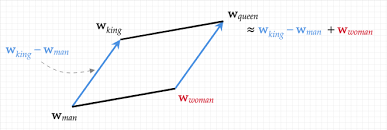

### 🧩 GloVe (Global Vectors)

* Learns from **global word co-occurrence** statistics
* Captures **word relationships** like:

  * vector(“King”) - vector(“Man”) + vector(“Woman”) ≈ vector(“Queen”)

### 🚀 FastText

* Improves Word2Vec by using **subword information**
* Understands “playing”, “played”, “player” better

---

### 😕 Issues with These 3

* Use **small context windows**
* Can’t handle **long dependencies**
* Use **simple neural networks (1-layer MLP)**
* Not truly context-aware

---

## 🧨 GAME CHANGER: Transformers

Transformers changed everything.

### 🤖 BERT (Bidirectional Encoder Representations from Transformers)

* Looks at both left and right context (bidirectional)
* Example: fills in blanks using full sentence:

  * “The **\[MASK]** barked loudly.” → likely “dog”

### 🧠 GPT (Generative Pretrained Transformer)

* Reads from **left to right** (like humans writing)
* Good at generating text
* Learns context as it goes

---

## 🧩 Summary

| Method    | Aware of Context? | Sparse? | Learns Meaning? |
| --------- | ----------------- | ------- | --------------- |
| BoW       | ❌                 | ✅       | ❌               |
| One-hot   | ❌                 | ✅       | ❌               |
| TF-IDF    | ❌                 | ✅       | ⬛ Partial       |
| Word2Vec  | ✅ (local only)    | ❌       | ✅               |
| GloVe     | ✅ (global stats)  | ❌       | ✅               |
| FastText  | ✅ (subwords)      | ❌       | ✅               |
| BERT, GPT | ✅✅✅ (deep)        | ❌       | ✅✅✅             |





## 📊 TF-IDF: Term Frequency – Inverse Document Frequency

TF-IDF is a **statistical method** used to reflect how important a word is to a **document** in a **collection (corpus)**.

It improves on **Bag of Words** by reducing the weight of **common words** and highlighting **unique or rare terms**.


Keynote:
**"The more a word appears in a specific document, the more important it is. \
But the more it appears across all documents, the less unique and useful it becomes."**

---

## ✅ Formula

For each word $w$ in a document $d$:

* **TF(w)** = (Number of times $w$ appears in $d$) / (Total words in $d$)
* **IDF(w)** = $\log \left( \frac{N}{DF(w)} \right)$

Where:

* $N$ = total number of documents
* $DF(w)$ = number of documents containing word $w$

Then:

**TF-IDF(w, d) = TF(w) × IDF(w)**

---

## 🧮 Example

Let's take **3 documents**:

```
Doc1: "I love machine learning"
Doc2: "machine learning is fun"
Doc3: "deep learning and machine vision"
```

### Step 1: Build Vocabulary

**All unique words:**
`["I", "love", "machine", "learning", "is", "fun", "deep", "and", "vision"]`

---

### Step 2: Term Frequencies (TF)

**Doc1** = "I love machine learning" (4 words)

* TF("I") = 1/4 = 0.25
* TF("love") = 1/4 = 0.25
* TF("machine") = 1/4 = 0.25
* TF("learning") = 1/4 = 0.25

---

### Step 3: Document Frequencies (DF) and IDF

How many documents contain each word?

| Word     | DF | IDF = log(N / DF) |
| -------- | -- | ----------------- |
| I        | 1  | log(3/1) ≈ 1.098  |
| love     | 1  | log(3/1) ≈ 1.098  |
| machine  | 3  | log(3/3) = 0.000  |
| learning | 3  | log(3/3) = 0.000  |
| is       | 1  | log(3/1) ≈ 1.098  |
| fun      | 1  | log(3/1) ≈ 1.098  |
| deep     | 1  | log(3/1) ≈ 1.098  |
| and      | 1  | log(3/1) ≈ 1.098  |
| vision   | 1  | log(3/1) ≈ 1.098  |

---

### Step 4: TF-IDF for Doc1

Now multiply TF × IDF:

| Word     | TF   | IDF   | TF-IDF    |
| -------- | ---- | ----- | --------- |
| I        | 0.25 | 1.098 | 0.2745    |
| love     | 0.25 | 1.098 | 0.2745    |
| machine  | 0.25 | 0     | **0.000** |
| learning | 0.25 | 0     | **0.000** |

> So even though “machine” and “learning” are frequent, they appear in **every doc**, so IDF = 0. They’re **not helpful for distinguishing**.

---

### 💡 Why TF-IDF is Useful

* Reduces weight of **common, non-informative** words
* Highlights **discriminative** terms
* Often used in:

  * Search engines
  * Document classification
  * Text clustering





# 📘 Understanding Transformers, Embeddings & Outputs (important)

---

## ❓1. If Transformers Have Embeddings, Why Are They Called Embedding Models?

Transformers like **BERT** and **GPT** contain an **embedding layer** at the start — this layer turns words into vectors.

But we call them **embedding models** because:

> ⚡ Their **final hidden layers** produce **context-aware embeddings** — rich, meaningful representations of words or sentences.

These embeddings are:

* Dynamic (change based on context)
* Deep (learned through attention and multiple layers)

So while they contain an embedding layer, the **whole model** is what makes the embeddings powerful.

---

## ❓2. Are BERT and GPT Types of Transformers?

✅ **Yes.**
Both BERT and GPT are built on the **Transformer architecture**, but they use different parts:

| Model | Uses    | Direction     | Purpose                                    |
| ----- | ------- | ------------- | ------------------------------------------ |
| BERT  | Encoder | Bidirectional | Understanding tasks (e.g., classification) |
| GPT   | Decoder | Left-to-right | Generation tasks (e.g., text creation)     |

They are **not separate from transformers** — they **are transformers**, just with specific designs.

---

## ❓3. Aren’t the Final Outputs Just Probabilities, Not Embeddings?

Yes — in tasks like **sentiment analysis**, the final output is a **list of probabilities** (e.g., `[0.1, 0.9]` for negative/positive). That’s **not** an embedding.

But that’s because:

> 🧠 A **classifier head** is added on top of the transformer to produce that output.

If you want **embeddings**, you **extract them from the last hidden layers**, not from the final classifier.

### Example:

* You input: `"This movie is great"`
* BERT outputs:

  * A contextual vector for each token (word-level embedding)
  * Or a special `[CLS]` token vector (sentence embedding)

---

### 🧩 Final Summary

| Concept              | Is it an Embedding? | Purpose                             |
| -------------------- | ------------------- | ----------------------------------- |
| Word Embedding Layer | ✅ Yes               | Initial word vector representation  |
| Hidden Layer Output  | ✅ Yes               | Deep, contextual embeddings         |
| Final Classifier     | ❌ No                | Task-specific output (e.g., labels) |




# 📘 Word vs Sentence Embeddings: Focus on Feature Dimension

---

## 🔹 What is Feature (Embedding) Dimension?

> It's the **length of the vector** used to represent each word or sentence — the number of **features**.

More features → more information, but also higher computation.

---

## 🔹 Word-Level Embeddings

Each **word** is represented as a vector of fixed length:

* **Feature shape:**

  * For one word → `(embedding_dim,)`
  * For a sentence of N words → `(N, embedding_dim)`

* **Examples:**

| Method   | Typical Feature Dimension |
| -------- | ------------------------- |
| Word2Vec | 100, 200, 300             |
| GloVe    | 50, 100, 200, 300         |
| FastText | 300                       |

🧠 Used in models where each token is processed separately. \
Note: For TF/IDF method, embedding size is equal to number of words in dataset.(u can reduce it as a hyperparameter (max_features).)

---

## 🔹 Sentence-Level Embeddings

Each **sentence** is encoded as a single vector:

* **Feature shape:**

  * For one sentence → `(embedding_dim,)`
  * For M sentences → `(M, embedding_dim)`

* **Examples:**

| Method                           | Feature Dimension        |
| -------------------------------- | ------------------------ |
| Sentence-BERT (SBERT)            | 384, 768, 1024           |
| BERT `[CLS]` vector              | 768 (base), 1024 (large) |
| Universal Sentence Encoder (USE) | 512                      |
| GPT (pooled output)              | 768+                     |

---

## 🧩 Summary Table

| Method   | Level           | Output Shape         | Feature Dimension |
| -------- | --------------- | -------------------- | ----------------- |
| Word2Vec | Word            | (N, 300) for N words | 300               |
| GloVe    | Word            | (N, 100)             | 100               |
| FastText | Word            | (N, 300)             | 300               |
| BERT     | Word + Sentence | (N, 768) or (1, 768) | 768               |
| SBERT    | Sentence        | (1, 768)             | 768               |
| USE      | Sentence        | (1, 512)             | 512               |



#3. Word Embedding

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer # why .feature_extraction? because this is extracting features from words!

# Initialize the vectorizer
tfidf = TfidfVectorizer(max_features=2000)

# Fit on training data and transform both train and test
X_train_tfidf = tfidf.fit_transform(x_train)  # Use the 'text' column
X_test_tfidf = tfidf.transform(x_test)       # Transform test data (not fit again)


In [9]:
print(X_train_tfidf[22].toarray())
print(X_train_tfidf[22].shape)

[[0.07209534 0.         0.         ... 0.         0.         0.        ]]
(1, 2000)


# 4. Applying on models

In [10]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(multi_class='ovr',
                        max_iter=1000,
                        penalty='l1',
                        solver='saga')
lr.fit(X_train_tfidf, y_train)
y_pred_test = lr.predict(X_test_tfidf)
y_pred_train = lr.predict(X_train_tfidf)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Evaluate

In [11]:
from sklearn.metrics import classification_report


print('Report on train')
print(classification_report(y_train, y_pred_train))


print('Report on test')
print(classification_report(y_test, y_pred_test))


Report on train
              precision    recall  f1-score   support

           0       0.90      0.88      0.89     12500
           1       0.89      0.90      0.89     12500

    accuracy                           0.89     25000
   macro avg       0.89      0.89      0.89     25000
weighted avg       0.89      0.89      0.89     25000

Report on test
              precision    recall  f1-score   support

           0       0.89      0.87      0.88     12500
           1       0.87      0.89      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



Check on

In [2]:
movie_reviews = [
    # Positive Reviews
    "This movie was amazing! The story kept me engaged from start to finish.",
    "I loved the characters and the action scenes were thrilling. Highly recommend!",
    "A heartwarming film with great performances. One of the best this year.",
    "The visuals were stunning, and the soundtrack was perfect. A must-watch!",
    "Funny, emotional, and well-paced. I couldn’t ask for a better movie.",

    # Negative Reviews
    "The plot was boring and predictable. I couldn’t wait for it to end.",
    "Terrible acting and a weak script. A complete waste of time.",
    "The movie dragged on forever with no real payoff. Very disappointing.",
    "Bad CGI and unlikable characters. I regret watching this.",
    "Confusing story, poor direction. One of the worst films I’ve seen.",

    # Neutral/Mixed Reviews
    "It had some good moments, but overall it was just okay.",
    "The movie was decent, but nothing special. I expected more.",
    "Some parts were interesting, others were slow. Average at best.",
    "Not great, not terrible. Just a typical Hollywood film.",
    "The acting was good, but the story felt rushed. Mixed feelings."
]

# important note : we should apply everything applied before!
# Step 1: Wrap reviews into a DataFrame
movie_reviews = pd.DataFrame(movie_reviews, columns=["text"])

# Step 2: Clean each review using apply (correct use of clean_data)
movie_reviews["text"] = movie_reviews["text"].apply(clean_data)

# Step 3: Transform using TF-IDF
movie_reviews_tfidf = tfidf.transform(movie_reviews["text"])

# Step 4: Predict and evaluate
def evaluate_tricky_reviews(tfidf_reviews, raw_texts, trained_model=lr):
    pred_labels = trained_model.predict(tfidf_reviews)
    for i, label in enumerate(pred_labels):
        print(raw_texts.iloc[i])
        print('Predicted As Positive' if label == '1' else 'Predicted As Negative')
        print()

evaluate_tricky_reviews(movie_reviews_tfidf, movie_reviews["text"], lr)






## 📘 Word2Vec for Sentence Classification

### 🔹 Background

* **Word2Vec** is a **word-level embedding method**:
  It gives a vector for each word based on its context in large corpora.

* **TF-IDF** is a **sentence-level embedding** (sort of):
  It creates a bag-of-words vector for an entire sentence or document.

---

### 🔄 Transition in Our Code

In our previous code, we used **TF-IDF**, which directly produced a feature vector for a full sentence.

Now, we want to use **Word2Vec**, which embeds **individual words**.

### ⚠️ Two Issues:

1. We have full sentences, but Word2Vec needs words → ✅ **Solution: Tokenization**
2. Word2Vec outputs **word vectors**, but we want to classify the **whole sentence** → ✅ **Solution: Aggregation (e.g., mean)**

---

### 🧠 Why `mean` works?

Because Word2Vec captures **semantic similarity** and **context**, averaging the vectors still keeps a good representation of the sentence’s meaning.

---

## ✂️ Tokenization Types & Examples

| Type         | Example Input                    | Output                            |
| ------------ | -------------------------------- | --------------------------------- |
| **Document** | A text file with many paragraphs | Paragraphs                        |
| **Sentence** | "I love AI. It’s amazing!"       | `["I love AI.", "It’s amazing!"]` |
| **Word**     | "I love AI."                     | `["I", "love", "AI", "."]`        |

> 🔸 On average, **1 token ≈ 4 characters**

---

## 🛠 Tokenization Tools

| Library    | Purpose                                |
| ---------- | -------------------------------------- |
| **NLTK**   | Word/sentence tokenization, corpora    |
| **spaCy**  | Fast, accurate tokenization & NLP      |
| **Gensim** | Word2Vec training & pre-trained models |

---

**sentence → word tokens → word2vec → sentence vector → classifier** ✅


Note : tokenization is required in TF-IDF, but it's handled automatically by TfidfVectorizer in scikit-learn.

### **Tokenization in NLP: Built-in or needed**  

#### **1. Traditional Methods**  
- **BoW/TF-IDF**: Explicit word splitting.  
  ```python
  CountVectorizer().fit_transform(["text"])  
  ```  
- **Word2Vec**: Needs pre-tokenized words.  
  ```python
  Word2Vec([["cat"], ["dog"]])  
  ```  

#### **2. Modern Methods**  
- **FastText**: Uses subwords (e.g., `"cat" → ["ca", "at"]`).  
  ```python
  FastText(sentences, min_n=3, max_n=6)  
  ```  
- **BERT**: WordPiece tokenization (e.g., `"running" → ["run", "##ning"]`).  
  ```python
  BertTokenizer.from_pretrained("bert-base-uncased")  
  ```  

#### **Key Takeaways**  
- **Old models (BoW, Word2Vec)**: Manual tokenization.  
- **New models (FastText, BERT)**: Built-in subword handling.  
- **Rule**: Always check tokenizer compatibility with your text!  

---
**For OOV/rare words**: Prefer **FastText** or **BERT**.  
**For speed**: Use **BoW**.  
**For multilingual**: **BERT**’s WordPiece.  



### **Tokenization: Mini Guidebook**  
*(Char, Word, Subword & Performance Impact)*  

---

#### **1. Tokenization Types**
**Char-Level**  
- Splits text into characters  
  `"cat" → ["c","a","t"]`  
  ✅ Handles all words  
  ❌ Long sequences, loses meaning  

**Word-Level**  
- Splits into whole words  
  `"cats running" → ["cats","running"]`  
  ✅ Simple, preserves meaning  
  ❌ Fails on OOV (→ `[UNK]`)  

**Subword** *(Best for modern NLP)*  
- Splits rare words into parts  
  `"tokenization" → ["token","##ization"]`  
  ✅ Balances vocab size & OOV handling  

---

#### **2. What is OOV?**  
**Out-Of-Vocabulary (OOV)**: Words not in model's vocabulary  
- **Problem**: Becomes `[UNK]` → Information loss  
- **Example**:  
  - Word-level: `"ChatGPT"` → `[UNK]` (if not in vocab)  
  - Subword: `"ChatGPT"` → `["Chat","G","PT"]` *(no info loss)*  

---

#### **3. Why Subword > Others?**  
| **Case**       | Word-Level | Subword |  
|----------------|------------|---------|  
| Rare word: `"unhappiness"` | `[UNK]` | `["un","##happy","##ness"]` |  
| Typo: `"gooood"` | `[UNK]` | `["goo","##od"]` |  
| Multilingual: `"こんにちは"` | `[UNK]` | `["こん","にち","は"]` |  

**Accuracy Boost**:  
- Subwords preserve meaning of rare/foreign words  
- No `[UNK]` collapse → Better embeddings  

---

#### **4. Performance Tradeoffs**  
| Metric        | Char  | Word  | Subword |  
|---------------|-------|-------|---------|  
| Vocab Size    | ~100  | 50k+  | 10k-50k |  
| OOV Handling  | Perfect | Poor | Excellent |  
| Best For      | Noisy text | Simple tasks | Most NLP tasks |  

**Rule**: Use **subword** (BERT's WordPiece/SentencePiece) for best results.  


In [13]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt', quiet=True) # word_tokenize in NLTK relies on a pretrained tokenizer model called punkt, which is not downloaded by default.

try:
    nltk.download('punkt_tab', quiet=True)
except:
    # If punkt_tab isn't available as a separate package, we'll force re-download punkt
    print("punkt_tab not available as separate package, re-downloading punkt")
    nltk.download('punkt', force=True, quiet=True)




In [14]:
! pip install gensim


In [25]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import numpy as np
import nltk

nltk.download('punkt', quiet=True)

# Step 1: Clean training data
x_train = x_train.apply(clean_data)

# Step 2: Tokenize each sentence
tokenized_sentences = [word_tokenize(sentence) for sentence in x_train]

# Step 3: Train Word2Vec model on training data only
w2v_model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, min_count=1, workers=4)

# Step 5: Get mean sentence vector for each tokenized sentence
def sentence_vector(tokens, model):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if vectors: # If vectors is an empty list (e.g., no known words in the sentence), the condition is False.
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

# Step 6: Apply to training and test data
sentence_vectors_train = [sentence_vector(tokens, w2v_model) for tokens in tokenized_sentences]

x_test = x_test.apply(clean_data)  # Clean test data using same function
tokenized_test = [word_tokenize(sentence) for sentence in x_test]
sentence_vectors_test = [sentence_vector(tokens, w2v_model) for tokens in tokenized_test]

# Step 7: Result
print("Vector shape:", sentence_vectors_train[0].shape)
print("First training vector:", sentence_vectors_train[0])


Vector shape: (100,)
First training vector: [ 0.18706402  0.06621095 -0.30691734  0.1662774  -0.2188686  -0.7938571
  0.08498578  0.4258268   0.3356657   0.37468114  0.09787153 -0.712832
  0.14395455  0.5682975   0.18267907 -0.50050473  0.2883416  -0.33524716
  0.04140221 -0.47746032  0.32923642  0.7117715   0.00677291 -0.36855328
  0.13263822  0.43961102 -0.3949407   0.57342273 -0.6192005   0.5829461
 -0.00167233 -0.03239213 -0.09047973 -0.3742152  -0.68351495  0.01979643
 -0.35550302  0.26217905 -0.30985612 -0.0668752  -0.02308727 -0.3321308
 -0.31935808 -0.25562984  0.6481888   1.1530855   0.08785527  0.10598656
  0.15116532  0.4840625  -0.7202889  -0.4756044   0.03061059 -0.5008754
 -0.09505047 -0.26238492  0.10686013 -0.18649475 -0.31934837 -0.132136
 -0.21598145 -0.12653671 -0.4050513   0.37775612 -0.14875823 -0.3341247
 -0.25966024  0.2313892  -0.15444197  0.19608968  0.46020025 -0.27881387
 -0.17502408 -0.642386    0.20970051 -0.02148138 -0.5978978   0.49202734
 -0.12337936 -0.

In [26]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(multi_class='ovr',
                        max_iter=1000,
                        penalty='l1',
                        solver='saga')
lr.fit(sentence_vectors_train, y_train)
y_pred_train = lr.predict(sentence_vectors_train)
y_pred_test = lr.predict(sentence_vectors_test)



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [27]:


print('Report on train')
print(classification_report(y_train, y_pred_train))


print('Report on test')
print(classification_report(y_test, y_pred_test))


Report on train
              precision    recall  f1-score   support

           0       0.84      0.83      0.83     12500
           1       0.83      0.84      0.84     12500

    accuracy                           0.83     25000
   macro avg       0.83      0.83      0.83     25000
weighted avg       0.83      0.83      0.83     25000

Report on test
              precision    recall  f1-score   support

           0       0.83      0.83      0.83     12500
           1       0.83      0.84      0.83     12500

    accuracy                           0.83     25000
   macro avg       0.83      0.83      0.83     25000
weighted avg       0.83      0.83      0.83     25000




### **Domain-Specific Pretrained BERT Models**  
*(Includes custom tokenizers + embeddings optimized for specialized text)*  

#### **1. Biomedicine & Healthcare**  
- **BioBERT**  
  - *Pretrained on:* PubMed abstracts, PMC full-text articles  
  - *Tokenizer:* Medical-term-aware WordPiece  
  - *Use Case:* Drug-disease NER, clinical note analysis  

- **ClinicalBERT**  
  - *Pretrained on:* MIMIC-III ICU notes  
  - *Tokenizer:* Handles clinical abbreviations (e.g., "PT" → "patient")  
  - *Use Case:* Readmission prediction, diagnosis coding  

#### **2. Legal & Finance**  
- **Legal-BERT**  
  - *Pretrained on:* Court cases, contracts  
  - *Tokenizer:* Captures legal phrases ("force majeure")  
  - *Use Case:* Contract clause extraction  

- **FinBERT**  
  - *Pretrained on:* Financial reports, earnings calls  
  - *Tokenizer:* Financial jargon-aware ("EBITDA")  
  - *Use Case:* Stock sentiment analysis  

#### **3. Science & Engineering**  
- **SciBERT**  
  - *Pretrained on:* Computer science/biomed papers  
  - *Tokenizer:* STEM-focused (e.g., "arXiv" as one token)  
  - *Use Case:* Academic paper summarization  

- **PatentBERT**  
  - *Pretrained on:* USPTO patents  
  - *Tokenizer:* Technical compound-word splitting  
  - *Use Case:* Patent prior-art search  

#### **4. Social Media & Low-Resource Languages**  
- **BERTweet**  
  - *Pretrained on:* Twitter data  
  - *Tokenizer:* Emoji-aware (😂 → single token)  
  - *Use Case:* Tweet toxicity detection  

- **AraBERT**  
  - *Pretrained on:* Arabic text + dialects  
  - *Tokenizer:* Handles Arabic script variations  
  - *Use Case:* Arabic hate speech detection  

---

### **Key Notes**  
- **All models include**:  
  ✅ Domain-adapted tokenizers (avoid OOV for jargon)  
  ✅ Pretrained embeddings (capture domain semantics)  
  ✅ Same architecture as original BERT  

- **Find them on**: Hugging Face (`transformers` library) with names like `bert-base-financial` or `biobert-v1.1`.  

---

### **When to Use?**  
| Scenario                  | Generic BERT | Domain-Specific BERT |  
|---------------------------|--------------|-----------------------|  
| General text (news, reviews) | ✅          | ❌ Overkill           |  
| Medical/legal/financial text | ❌ Poor OOV | ✅ **Best accuracy**  |  

*(Example: BioBERT improves `F1-score by 5%+` over vanilla BERT on clinical NER tasks.)*  


### **What is Jargon?**  
**Jargon** refers to specialized vocabulary used by a particular profession, group, or field. It includes:  
- **Technical terms** (e.g., *"mitochondria"* in biology)  
- **Abbreviations** (e.g., *"AML"* in medicine = Acute Myeloid Leukemia)  
- **Field-specific phrases** (e.g., *"liquidity ratio"* in finance)  

---

### **Why Jargon Matters in NLP**  
1. **OOV (Out-of-Vocabulary) Problems**:  
   - Generic tokenizers (e.g., BERT’s default) may split jargon incorrectly:  
     - *"Deoxyribonucleic"* → `["De", "##oxy", "##ribo", "##nucleic"]` (suboptimal for biology).  
   - Domain-specific models (e.g., **BioBERT**) preserve meaningful units:  
     - *"Deoxyribonucleic"* → `["Deoxyribonucleic"]` (single token).  

2. **Embedding Quality**:  
   - Generic embeddings may misrepresent jargon (e.g., *"GPU"* as *graphics card* vs. *medical imaging*).  
   - Domain-tuned embeddings capture correct semantics.  

---

### **Examples of Jargon Across Fields**  
| Field          | Jargon Term       | Meaning                              |  
|----------------|-------------------|--------------------------------------|  
| **Medicine**   | *"STAT"*          | Immediately (from Latin *statim*)    |  
| **Law**        | *"Habeas corpus"* | Court order for detainee presentation |  
| **Finance**    | *"Alpha"*         | Excess return on investment          |  
| **Tech**       | *"Kubernetes"*    | Container orchestration system       |  

---

### **How to Handle Jargon in NLP**  
1. **Use Domain-Specific Models**:  
   - BioBERT (medicine), Legal-BERT (law), FinBERT (finance).  
2. **Custom Tokenizers**:  
   - Add jargon terms to the vocabulary (e.g., *"STAT"* as one token).  
3. **Fine-Tune Embeddings**:  
   - Train on domain corpora to learn jargon meanings.  

---

### **Key Takeaway**  
Jargon requires **domain-adapted tokenization + embeddings** to avoid:  
- Information loss (OOV → `[UNK]`)  
- Semantic misinterpretation  


# BERT Based

In [ ]:
!pip install transformers torch


In [5]:

from transformers import pipeline

# Load the pretrained 5‑star sentiment pipeline
classifier = pipeline(
    "sentiment-analysis",
    model="nlptown/bert-base-multilingual-uncased-sentiment",
    tokenizer="nlptown/bert-base-multilingual-uncased-sentiment"
)


# Predict star ratings
results = classifier(movie_reviews, batch_size=8)

# Display results
for review, res in zip(movie_reviews, results):
    print(f"\"{review[:1000]}...\" → {res['label']} (confidence {res['score']:.2f})")


Device set to use cpu


"This movie was amazing! The story kept me engaged from start to finish...." → 5 stars (confidence 0.79)
"I loved the characters and the action scenes were thrilling. Highly recommend!..." → 5 stars (confidence 0.89)
"A heartwarming film with great performances. One of the best this year...." → 5 stars (confidence 0.86)
"The visuals were stunning, and the soundtrack was perfect. A must-watch!..." → 5 stars (confidence 0.94)
"Funny, emotional, and well-paced. I couldn’t ask for a better movie...." → 5 stars (confidence 0.63)
"The plot was boring and predictable. I couldn’t wait for it to end...." → 2 stars (confidence 0.57)
"Terrible acting and a weak script. A complete waste of time...." → 1 star (confidence 0.89)
"The movie dragged on forever with no real payoff. Very disappointing...." → 1 star (confidence 0.63)
"Bad CGI and unlikable characters. I regret watching this...." → 1 star (confidence 0.68)
"Confusing story, poor direction. One of the worst films I’ve seen...." → 1 star (co

### **Comprehensive Step-by-Step Breakdown of BERT**  
*Integrating all components: Encoder, MLM, NSP, and workflow*

---

#### **Step 1: Input Processing**  
1. **Tokenization**:  
   - Text split into subwords using **WordPiece** (e.g., "playing" → `["play", "##ing"]`).  
   - Special tokens added:  
     - `[CLS]`: Start token (used for classification).  
     - `[SEP]`: Separates sentences.  
     - `[MASK]`: Placeholder for masked words (15% of tokens).  

2. **Embedding Construction**:  
   Three embeddings are summed:  
   - **Token Embedding**: Learned vector for each subword.  
   - **Position Embedding**: Encodes token position (0 to 511).  
   - **Segment Embedding**: Indicates Sentence A (`0`) or Sentence B (`1`).  
   *Output*: `[input_length × hidden_size]` matrix (e.g., 512×768 for BERT-Base).

---

#### **Step 2: Transformer Encoder Processing**  
**Key**: The encoder is a stack of identical layers (12 in BERT-Base, 24 in BERT-Large).  
Each layer consists of:  
1. **Multi-Head Self-Attention**:  
   - Computes attention scores between all token pairs:  
     ```
     Attention(Q,K,V) = softmax(QKᵀ/√dₖ) ⋅ V  
     ```  
   - Uses 12 parallel attention "heads" (each with 64-dim projections).  
2. **Feed-Forward Network**:  
   - Two linear layers with GELU activation:  
     `FFN(x) = GELU(xW₁ + b₁)W₂ + b₂`  
3. **Residual Connections + LayerNorm**:  
   - `LayerNorm(x + Sublayer(x))` after each sublayer.  

*Output*: Contextual embeddings for each token (e.g., `[512×768]`).

---

#### **Step 3: Pre-Training Tasks**  
**A. Masked Language Modeling (MLM)**  
1. **Masking Strategy**:  
   - 15% of tokens randomly selected:  
     - 80% → `[MASK]`  
     - 10% → Random token  
     - 10% → Unchanged  
2. **Prediction Head**:  
   - Takes output embedding of masked positions.  
   - Applies linear layer: `Wₘₗₘ ⋅ hₘₐₛₖ + bₘₗₘ` → `[vocab_size]` logits.  
3. **Loss Calculation**:  
   - Cross-entropy loss between predicted logits and original token ID.  

**B. Next Sentence Prediction (NSP)**  
1. **Input Construction**:  
   - 50% consecutive sentences: `[CLS] Sentence A [SEP] Sentence B [SEP]` → Label `IsNext`  
   - 50% random sentences: `[CLS] Sentence A [SEP] Random [SEP]` → Label `NotNext`  
2. **Prediction Head**:  
   - Uses `[CLS]` token's output embedding.  
   - Applies linear layer: `Wₙₛₚ ⋅ h_{[CLS]} + bₙₛₚ` → 2D logits.  
3. **Loss Calculation**:  
   - Binary cross-entropy loss for `IsNext/NotNext`.  

**Training**: Joint optimization of `Loss = Loss_MLM + Loss_NSP` on large corpora (e.g., Wikipedia + BookCorpus).

---

#### **Step 4: Fine-Tuning for Downstream Tasks**  
1. **Task-Specific Input Modification**:  
   - **Single Sentence**: `[CLS] Text [SEP]`  
   - **Sentence Pair**: `[CLS] TextA [SEP] TextB [SEP]`  
   - **Q&A**: `[CLS] Question [SEP] Passage [SEP]`  

2. **Task-Specific Output Heads**:  
   - **Classification** (e.g., sentiment):  
     Use `h_{[CLS]}` → Linear layer → Softmax.  
   - **Token Labeling** (e.g., NER):  
     Apply linear layer to each token's output → Softmax per token.  
   - **Span Prediction** (e.g., SQuAD):  
     Two linear layers (start/end positions) over token outputs.  

3. **Training**:  
   - Initialize with pre-trained encoder weights.  
   - Update entire model (encoder + task head) on task-specific data.  

---

### **Visual Workflow Summary**
```mermaid
graph TB
  A[Raw Text] --> B(Tokenize & Add Special Tokens)
  B --> C[Embedding Layer: Token+Position+Segment]
  C --> D[Transformer Encoder Layers x12/x24]
  D --> E[Contextual Embeddings]

  %% Pre-training
  E --> F[MLM Head] --> G[Predict Masked Words]
  E --> H[CLS Embedding] --> I[NSP Head] --> J[Predict Sentence Relation]
  G & J --> K[Joint Loss] --> L[Update Encoder]

  %% Fine-tuning
  E --> M[Task-Specific Head]
  M --> N[Task Output: Labels/Spans/Class]
```

---

### **Key Technical Details**  
- **Encoder Outputs**:  
  - Each token: 768-dim vector (BERT-Base).  
  - `[CLS]` vector: Aggregates sequence information.  
- **Pre-Training Efficiency**:  
  - MLM forces deep bidirectional understanding.  
  - NSP teaches sentence-level relationships.  
- **Fine-Tuning Flexibility**:  
  - Same encoder reused across tasks.  
  - Only task heads are task-specific.  

> ⚡ **Why BERT Works**:  
> The encoder learns universal language representations during pre-training (MLM + NSP), which transfer efficiently to downstream tasks via light fine-tuning.

### **BERT Full Process Diagram with Input Example**  
Here's a complete visualization of BERT's workflow with a concrete input example, showing how data flows through all components:

```mermaid
graph TB
    %% ===== INPUT EXAMPLE =====
    A["Input Example:
    Sentence A: 'The cat sat on the mat'
    Sentence B: 'It was furry'
    Masked: 'The [MASK] sat on the mat'"]

    %% ===== TOKENIZATION & EMBEDDING =====
    A --> B
    subgraph "Tokenization & Embedding"
        B["Step 1: Tokenization
        - WordPiece: ['The', '[MASK]', 'sat', 'on', 'the', 'mat', 'It', 'was', 'furry']
        - Add Special Tokens:
          [CLS] The [MASK] sat on the mat [SEP] It was furry [SEP]"]
        --> C["Step 2: Embedding Construction
        Token Embeddings: Learned vectors
        Position Embeddings: Sinusoidal encoding
        Segment Embeddings:
          [0,0,0,0,0,0,0,1,1,1,1]"]
        --> D["Embedding Matrix (11×768)"]
    end

    %% ===== TRANSFORMER ENCODER =====
    D --> E
    subgraph "Transformer Encoder (12 Layers)"
        E["Step 3: Encoder Processing
        Layer 1:
        - Multi-Head Self-Attention:
          Q·Kᵀ/√dₖ → softmax → ·V
        - Feed-Forward Network: GELU(W₂·GELU(W₁·x))
        - LayerNorm(residual + output)"]
        --> F[...]
        --> G["Layer 12:
        Final contextual embeddings
        (11×768 matrix)"]
    end

    %% ===== PRE-TRAINING HEADS =====
    G --> H & I
    subgraph "Pre-Training Objectives"
        H["Step 4a: MLM Head
        - Extract [MASK] embedding (position 2)
        - Linear Layer: Wₘₗₘ·h₂ + bₘₗₘ
        - Softmax → Predict 'cat' (ID:5432)
        - Loss: Cross-entropy"]
        
        I["Step 4b: NSP Head
        - Extract [CLS] embedding (position 0)
        - Linear Layer: Wₙₛₚ·h₀ + bₙₛₚ
        - Softmax → Predict 'IsNext' (prob:0.92)
        - Loss: Binary cross-entropy"]
    end

    %% ===== BACKPROP & OUTPUT =====
    H & I --> J["Step 5: Backpropagation
    - Update encoder weights
    - Update MLM/NSP head weights
    Total Loss = MLM Loss + NSP Loss"]
    --> K["Output: Optimized Encoder
    (Ready for fine-tuning)"]

    %% ===== FINE-TUNING EXAMPLE =====
    K --> L
    subgraph "Fine-Tuning (e.g., Sentiment Analysis)"
        L["New Input:
        [CLS] This movie is great! [SEP]"]
        --> M["Same Encoder Processing"]
        --> N["Use [CLS] embedding"]
        --> O["Task Head:
        Linear Layer → Softmax
        Prediction: 'Positive' (95%)"]
    end

    classDef example fill:#f9f,stroke:#333;
    class A,L example;
```

---

### **Step-by-Step Processing of the Example**
**Input Text:**  
`[CLS] The [MASK] sat on the mat [SEP] It was furry [SEP]`

1. **Tokenization & Embedding**  
   - Tokens: `[CLS]`, `The`, `[MASK]`, `sat`, `on`, `the`, `mat`, `[SEP]`, `It`, `was`, `furry`, `[SEP]`  
   - Embeddings:  
     ```
     [CLS]  → Token(101) + Position(0) + Segment(0)
     [MASK] → Token(103) + Position(2) + Segment(0)
     [SEP]  → Token(102) + Position(7) + Segment(1)
     ```

2. **Encoder Processing**  
   - Each token passes through 12 transformer layers  
   - After Layer 1:  
     - `[MASK]` sees context from all words → embedding starts changing  
   - After Layer 12:  
     - `[MASK]` embedding contains info about "cat" (animal + fur)  
     - `[CLS]` embedding encodes sentence relationship

3. **MLM Head**  
   - Takes position 2 embedding (`[MASK]`)  
   - Converts to vocabulary logits:  
     ```
     "cat": 8.2, "dog": 6.1, "mat": 1.3, ...
     ```
   - Softmax → Predicts "cat" with 85% probability

4. **NSP Head**  
   - Takes position 0 embedding (`[CLS]`)  
   - Classifier outputs:  
     ```
     IsNext: 0.92, NotNext: 0.08
     ```

5. **Backpropagation**  
   - Updates weights to:  
     - Make `[MASK]` embedding better predict "cat"  
     - Make `[CLS]` embedding clearer for sentence relations

6. **Fine-Tuning**  
   - New input: `[CLS] This movie is great! [SEP]`  
   - Same encoder produces `[CLS]` embedding  
   - Task head classifies as "Positive" using learned features

---

### **Key Observations**
1. The `[MASK]` token's embedding evolves from a generic vector to one containing specific info about:
   - Animals (from "furry" in Sentence B)
   - Sitting behavior (from "sat on the mat")

2. The `[CLS]` embedding absorbs:
   - Lexical coherence (cat → furry)
   - Grammatical connection (pronoun "It" reference)

3. During fine-tuning:
   - The encoder reuses patterns learned from MLM/NSP
   - Task-specific head leverages contextual knowledge without retraining fundamentals

This end-to-end flow shows how BERT's components interact to transform raw text into deeply contextualized representations! 🚀

The `[CLS]` and `[MASK]` embeddings in BERT serve specific purposes:

### **1. `[CLS]` Embedding**
- **Purpose**: Used for **classification tasks** (e.g., sentiment analysis, NSP).  
- **Location**: First token (`[CLS]`) in input.  
- **Behavior**:  
  - Aggregates **global sentence meaning** via self-attention.  
  - During fine-tuning, its output is fed to a task-specific classifier.  

### **2. `[MASK]` Embedding**
- **Purpose**: Used **only during pre-training** for Masked Language Modeling (MLM).  
- **Behavior**:  
  - Replaces 15% of input tokens (e.g., "cat" → `[MASK]`).  
  - The encoder predicts the original word from its contextual embedding.  
  - Discarded in fine-tuning (real words are used instead).  

### **Key Difference**
| Token   | Used in Pre-training? | Used in Fine-tuning? | Purpose                     |
|---------|-----------------------|----------------------|-----------------------------|
| `[CLS]` | Yes (NSP)             | Yes                  | Sentence-level prediction   |
| `[MASK]`| Yes (MLM)             | No                   | Word-level prediction       |

Both are **temporary training tools** except `[CLS]`, which remains active in downstream tasks.